In [206]:
import codecs,math,pickle
import pandas as pd
import numpy as np
import itertools as it
import matplotlib as mplt
import matplotlib.pyplot as plt

In [207]:
saveFiles=False

In [208]:
%matplotlib inline

In [209]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("poster")
sns.set_palette("husl")

In [210]:
nomLexiqueOrg="/Users/gilles/ownCloud/Python/phonemisation/Lexique380-UTF8.txt"
nomRepertoire="/Volumes/gilles/Transfert/Copies-iMac-GB/Python/phonemisation/"
nomLexiqueOrg=nomRepertoire+"Lexique380-UTF8.txt"
#nomFlexiqueVerbes="/Users/gilles/Github/flexique/data/vlexique.csv"
nomLexiqueOrg="/Users/gilles/Dropbox/Travail/Recherche/BoKu/LingInfo/Lexique3/Lexique381/Lexique381.txt"
Lexique3=pd.read_csv(nomLexiqueOrg,sep="\t",encoding="utf8")
#vlexique=pd.read_csv(nomFlexiqueVerbes,sep=",",header=None)

In [211]:
Lexique3.columns#, vlexique.columns

Index([u'1_ortho', u'2_phon', u'3_lemme', u'4_cgram', u'5_genre', u'6_nombre',
       u'7_freqlemfilms2', u'8_freqlemlivres', u'9_freqfilms2',
       u'10_freqlivres', u'11_infover', u'12_nbhomogr', u'13_nbhomoph',
       u'14_islem', u'15_nblettres', u'16_nbphons', u'17_cvcv', u'18_p_cvcv',
       u'19_voisorth', u'20_voisphon', u'21_puorth', u'22_puphon', u'23_syll',
       u'24_nbsyll', u'25_cv-cv', u'26_orthrenv', u'27_phonrenv',
       u'28_orthosyll', u'29_cgramortho', u'30_deflem', u'31_defobs',
       u'32_old20', u'33_pld20', u'34_morphoder', u'35_nbmorph'],
      dtype='object')

In [212]:
lex3=Lexique3[["1_ortho","2_phon","3_lemme","4_cgram","5_genre","6_nombre","7_freqlemfilms2","8_freqlemlivres","9_freqfilms2","10_freqlivres","11_infover"]]

- extraction des verbes de Lexique3 => *verb3*

In [213]:
lex3.loc[:,"7_freqlemfilms2"]=lex3.loc[:,"7_freqlemfilms2"].astype(float)
lex3.loc[:,"8_freqlemlivres"]=lex3.loc[:,"8_freqlemlivres"].astype(float)
lex3.loc[:,"9_freqfilms2"]=lex3.loc[:,"9_freqfilms2"].astype(float)
lex3.loc[:,"10_freqlivres"]=lex3.loc[:,"10_freqlivres"].astype(float)

In [214]:
lex3.rename(columns={'11_infover':'lex3_11_infover'}, inplace=True)

In [215]:
verb3=lex3[lex3["4_cgram"]=="VER"]

- élimination des infover mal formés
 - liste des 412 problèmes
 - remplacement des infover problématiques par un tag cohérent

In [216]:
verb3[(verb3["lex3_11_infover"].str.split(";").apply(set).str.len()!=verb3["lex3_11_infover"].str.split(";").str.len())]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
481,abriter,abRite,abriter,VER,NaN,NaN,7.92,26.22,2.37,6.96,inf;;inf;;inf;;
659,absous,apsu,absoudre,VER,m,NaN,2.66,3.72,1.15,1.08,imp:pre:2s;ind:pre:1s;par:pas;par:pas;par:pas;
1094,accompagner,ak§paNe,accompagner,VER,NaN,NaN,90.56,124.46,24.87,22.23,inf;;
1729,acheté,aS°te,acheter,VER,m,s,290.70,148.38,72.38,28.72,par:pas;par:pas;par:pas;
1864,acquis,aki,acquérir,VER,m,NaN,8.30,29.66,3.52,13.65,ind:pas:1s;par:pas;par:pas;
2328,admirer,admiRe,admirer,VER,NaN,NaN,32.39,68.18,6.50,17.64,inf;;
2346,admis,admi,admettre,VER,m,NaN,50.05,59.46,6.74,11.35,ind:pas:1s;par:pas;par:pas;
2871,afficher,afiSe,afficher,VER,NaN,NaN,8.35,19.26,2.06,3.78,inf;;
2970,affirmé,afiRme,affirmer,VER,m,s,15.61,63.51,1.66,4.59,imp:pre:2s;par:pas;par:pas;
3040,affoler,afole,affoler,VER,NaN,NaN,5.92,20.54,1.00,2.50,inf;;


### Supprimer les tags incorrects
- imp:pre:3s n'existe pas en français

In [217]:
verb3.loc[:,"lex3_11_infover"]=verb3.loc[:,"lex3_11_infover"].str.replace("imp:pre:3s;","")

In [218]:
verb3[verb3["lex3_11_infover"].str.contains("imp:pre:3s")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover


### réparer les infover
1. effacer les ; finaux
1. couper sur les ;
1. éliminer les doublons
1. trier la liste
1. assembler la liste et ajouter un ; final
1. créer la colonne 11_infover corrigée

In [219]:
verb3.loc[:,"11_infover"]=verb3.loc[:,"lex3_11_infover"].str.strip(";").str.split(";").apply(set).apply(list).apply(sorted).str.join(";").str.strip(";")+";"

In [220]:
verb3

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover
2,a,a,avoir,VER,NaN,NaN,13572.40,6426.49,5498.34,1669.39,ind:pre:3s;,ind:pre:3s;
18,abaissa,abEsa,abaisser,VER,NaN,NaN,4.93,18.04,0.00,2.64,ind:pas:3s;,ind:pas:3s;
19,abaissai,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.10,0.07,ind:pas:1s;,ind:pas:1s;
20,abaissaient,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.00,0.41,ind:imp:3p;,ind:imp:3p;
21,abaissait,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.02,2.50,ind:imp:3s;,ind:imp:3s;
23,abaissant,abEs@,abaisser,VER,NaN,NaN,4.93,18.04,0.01,2.50,par:pre;,par:pre;
26,abaisse,abEs,abaisser,VER,NaN,NaN,4.93,18.04,1.28,3.45,imp:pre:2s;ind:pre:1s;ind:pre:3s;,imp:pre:2s;ind:pre:1s;ind:pre:3s;
29,abaissent,abEs,abaisser,VER,NaN,NaN,4.93,18.04,0.05,0.95,ind:pre:3p;,ind:pre:3p;
30,abaisser,abese,abaisser,VER,NaN,NaN,4.93,18.04,1.09,2.91,inf;,inf;
31,abaissera,abEs°Ra,abaisser,VER,NaN,NaN,4.93,18.04,0.19,0.07,ind:fut:3s;,ind:fut:3s;


In [221]:
verb3[verb3["3_lemme"]=="aimer"]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover
3967,aima,Ema,aimer,VER,NaN,NaN,1655.07,795.61,0.41,1.69,ind:pas:3s;,ind:pas:3s;
3971,aimai,EmE,aimer,VER,NaN,NaN,1655.07,795.61,0.20,0.81,ind:pas:1s;,ind:pas:1s;
3972,aimaient,EmE,aimer,VER,NaN,NaN,1655.07,795.61,6.20,16.42,ind:imp:3p;,ind:imp:3p;
3973,aimais,EmE,aimer,VER,NaN,NaN,1655.07,795.61,58.07,57.16,ind:imp:1s;ind:imp:2s;,ind:imp:1s;ind:imp:2s;
3974,aimait,EmE,aimer,VER,NaN,NaN,1655.07,795.61,49.57,128.72,ind:imp:3s;,ind:imp:3s;
3977,aimant,Em@,aimer,VER,NaN,NaN,1655.07,795.61,2.60,3.92,par:pre;,par:pre;
3991,aimasse,Emas,aimer,VER,NaN,NaN,1655.07,795.61,0.02,0.00,sub:imp:1s;,sub:imp:1s;
3992,aimassent,Emas,aimer,VER,NaN,NaN,1655.07,795.61,0.00,0.20,sub:imp:3p;,sub:imp:3p;
3993,aimassions,Emasj§,aimer,VER,NaN,NaN,1655.07,795.61,0.00,0.07,sub:imp:1p;,sub:imp:1p;
3994,aime,Em,aimer,VER,NaN,NaN,1655.07,795.61,751.29,257.57,imp:pre:2s;ind:pre:1s;ind:pre:1s;ind:pre:3s;su...,imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:1s;su...


In [222]:
verb3.groupby("11_infover")[["11_infover"]].count()

,11_infover
11_infover,
cnd:pre:1p;,242
cnd:pre:1s;,388
cnd:pre:1s;cnd:pre:2s;,567
cnd:pre:2p;,351
cnd:pre:2s;,54
cnd:pre:3p;,931
cnd:pre:3s;,1683
imp:pre:1p;,233
imp:pre:1p;ind:imp:1p;ind:pre:1p;,1


# Calculs pour Caveats with Entropy

## Préparations des données
- flemme regroupe toutes les cases d'un même lemme

In [223]:
flemme=verb3.groupby(by="3_lemme")[["11_infover"]].sum()

- calcul du nombre de cases par lemme

In [224]:
flemme["11_infover"].str.split(";").apply(set).str.len().sort_values()[-20:]

3_lemme
sentir       43
partir       43
mettre       43
dire         43
chercher     43
prendre      43
connaître    44
trouver      44
croire       44
vouloir      44
donner       44
pouvoir      44
passer       44
parler       44
savoir       45
devoir       46
aimer        46
faire        48
avoir        48
être         49
Name: 11_infover, dtype: int64

In [225]:
print len(flemme[flemme.index=="essayer"]["11_infover"].str.split(";").apply(set).values[0])

38


- ajout du genre et du nombre sur les cases du participe passé

In [226]:
def infoVer(row):
    genre=""
    nombre=""
    if isinstance(row["11_infover"],str) and "par:pas" in row["11_infover"]:
        if isinstance(row["5_genre"],str):
            genre=[row["5_genre"]]
        else:
            genre=["m","f"]
        if isinstance(row["6_nombre"],str):
            nombre=[row["6_nombre"]]
        else:
            nombre=["s","p"]
        participes=";".join(["par:pas:"+g+n for g in genre for n in nombre])
        return row["11_infover"].replace("par:pas",participes)
    elif isinstance(row["11_infover"],str) and not "par:pas" in row["11_infover"]:
        if isinstance(row["5_genre"],str) or isinstance(row["6_nombre"],str):
            print "PB avec %s, genre ou nombre sans participe passé"%row["1_ortho"]
        return row["11_infover"]
    else:
        return row["11_infover"]

In [227]:
verb3.loc[:,"infover"]=verb3.apply(lambda x: infoVer(x),axis=1)

In [228]:
verb3[(verb3["11_infover"].str.contains("par:pas")) & (verb3["3_lemme"]=="mettre")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover,infover
82937,mis,mi,mettre,VER,m,NaN,1004.83,1083.72,228.57,245.68,ind:pas:1s;ind:pas:2s;par:pas;par:pas;par:pas;...,ind:pas:1s;ind:pas:2s;par:pas;,ind:pas:1s;ind:pas:2s;par:pas;
82953,mise,miz,mettre,VER,f,s,1004.83,1083.72,35.33,46.69,par:pas;,par:pas;,par:pas;
82965,mises,miz,mettre,VER,f,p,1004.83,1083.72,5.36,9.05,par:pas;,par:pas;,par:pas;


In [229]:
colVerbLex3=['1_ortho','2_phon','3_lemme','4_cgram','5_genre','6_nombre','7_freqlemfilms2','8_freqlemlivres','9_freqfilms2','10_freqlivres','infover']
verbLex3=verb3[colVerbLex3].copy()
verbLex3.rename(columns={'infover':'11_infover'}, inplace=True)
if saveFiles: verbLex3.to_csv(nomRepertoire+"Verbes3.csv",sep="\t",encoding="utf8",index=False)

- ajout d'une colonne pour le nombre de cases de chaque lemme

In [230]:
flemme=verb3.groupby(by="3_lemme")[["infover"]].sum()
flemme["nbSet"]=flemme["infover"].str.split(";").apply(set).str.len()-1

In [231]:
flemme.sort_values("nbSet")

,infover,nbSet
3_lemme,,
scolariser,inf;,1
gringuer,inf;,1
grisailler,ind:pas:3p;,1
chatonner,ind:pre:3s;,1
griveler,ind:pre:3s;,1
charruer,par:pas;,1
charronner,par:pas;,1
grouiner,inf;,1
grinchir,inf;,1


- calcul du nombre de lemmes avec exactement une seule forme réparti par nom de case

In [232]:
flemme[(flemme["nbSet"]==1)].groupby(by="infover").count().sort_values("nbSet")

,nbSet
infover,
sub:pre:3s;,1
sub:imp:3s;,1
sub:imp:1s;,1
sub:pre:2s;,1
ind:pre:1p;,1
inf;inf;,2
ind:imp:1p;,2
ind:pas:2s;,2
imp:pre:1p;,3


## Quelle influence pour le imparfait 4/5 et le subjonctif 4/5
- combien des lexèmes ont exactement une seule forme dans Lex3 qui appartient à cette zone
 - 2 : sélecter et impulser
 - tous les deux des confusions probables avec les noms pluriels : sélections et impulsions
  - leur fréquence est 0 pour livres et le minimum 0.01 pour films

In [233]:
flemme[(flemme["infover"].str.contains("(ind:imp|sub:pre):(1|2)p")) & (flemme["nbSet"]==1)]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover,nbSet
3_lemme,,
impulser,ind:imp:1p;,1
sélecter,ind:imp:1p;,1


In [234]:
lex3[lex3["1_ortho"].isin(["sélections","impulsions"])]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
69193,impulsions,5pylsj§,impulser,VER,NaN,NaN,0.01,0.00,0.01,0.00,ind:imp:1p;
69194,impulsions,5pylsj§,impulsion,NOM,f,p,4.58,8.38,1.58,2.36,NaN


## Verbes sans formes fondamentales
- Combien de verbes n'ont aucune des formes fondamentales (infinitif, participe passé/présent, indicatif présent) ?
 - 135
- Combien de formes ont-ils ?
 - 1 forme : 114
 - 2 formes : 20
 - 3 formes :1

In [235]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover,nbSet
3_lemme,,
abouter,ind:imp:3s;imp:pre:1p;,2
aboutonner,ind:pas:1s;,1
abricoter,imp:pre:2p;,1
accalmir,ind:pas:3s;,1
acter,ind:pas:3s;ind:imp:1p;sub:pre:1p;,3
adire,ind:fut:3s;,1
agneler,ind:pas:3s;,1
aguiller,ind:fut:3s;,1
alper,ind:pas:3s;,1


In [236]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))].groupby(by="nbSet").count()

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover
nbSet,
1,114
2,20
3,1


In [237]:
%matplotlib inline

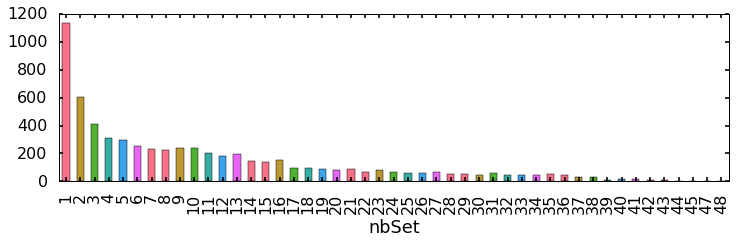

In [238]:
flemme.groupby(by="nbSet")["nbSet"].count().plot(kind="bar",figsize=(12,3))

In [239]:
print len(flemme[flemme.index=="distraire"]["infover"].str.split(";").apply(set).values[0])

24


In [240]:
lex3[(lex3["4_cgram"]=="VER") & (lex3["3_lemme"]=="distraire")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
37707,distraie,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.02,0.20,sub:pre:1s;sub:pre:3s;
37708,distraient,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.37,0.27,ind:pre:3p;sub:pre:3p;
37709,distraies,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.01,0.07,sub:pre:2s;
37710,distraira,distRERa,distraire,VER,NaN,NaN,16.0,27.77,0.41,0.34,ind:fut:3s;
37711,distrairaient,distRERE,distraire,VER,NaN,NaN,16.0,27.77,0.00,0.07,cnd:pre:3p;
37712,distrairait,distRERE,distraire,VER,NaN,NaN,16.0,27.77,0.05,0.41,cnd:pre:3s;
37713,distraire,distRER,distraire,VER,NaN,NaN,16.0,27.77,7.56,13.38,inf;;inf;;inf;;
37714,distrairont,distRER§,distraire,VER,NaN,NaN,16.0,27.77,0.01,0.07,ind:fut:3p;
37715,distrais,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.76,0.20,imp:pre:2s;ind:pre:1s;ind:pre:2s;
37716,distrait,distRE,distraire,VER,m,s,16.0,27.77,4.45,6.76,ind:pre:3s;par:pas;


In [241]:
Lexique3[(Lexique3["4_cgram"]=="VER") & (Lexique3["3_lemme"]=="manger")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,...,26_orthrenv,27_phonrenv,28_orthosyll,29_cgramortho,30_deflem,31_defobs,32_old20,33_pld20,34_morphoder,35_nbmorph
79702,mange,m@Z,manger,VER,NaN,NaN,467.82,280.61,103.81,31.96,...,egnam,Z@m,man-ge,VER,100.0,20.0,1.00,1.00,manger,1
79707,mangea,m@Za,manger,VER,NaN,NaN,467.82,280.61,0.66,5.54,...,aegnam,aZ@m,man-gea,VER,100.0,20.0,1.55,1.05,manger,1
79710,mangeai,m@ZE,manger,VER,NaN,NaN,467.82,280.61,0.02,1.55,...,iaegnam,EZ@m,man-geai,VER,100.0,20.0,1.70,1.30,manger,1
79711,mangeaient,m@ZE,manger,VER,NaN,NaN,467.82,280.61,0.99,7.91,...,tneiaegnam,EZ@m,man-geaient,VER,100.0,20.0,1.90,1.30,manger,1
79714,mangeais,m@ZE,manger,VER,NaN,NaN,467.82,280.61,2.31,2.91,...,siaegnam,EZ@m,man-geais,VER,100.0,20.0,1.75,1.30,manger,1
79715,mangeait,m@ZE,manger,VER,NaN,NaN,467.82,280.61,4.93,20.14,...,tiaegnam,EZ@m,man-geait,VER,100.0,20.0,1.60,1.30,manger,1
79716,mangeant,m@Z@,manger,VER,NaN,NaN,467.82,280.61,3.13,7.57,...,tnaegnam,@Z@m,man-geant,VER,100.0,20.0,1.80,1.35,manger,1
79717,mangeas,m@Za,manger,VER,NaN,NaN,467.82,280.61,0.10,0.07,...,saegnam,aZ@m,man-geas,VER,100.0,20.0,1.70,1.05,manger,1
79718,mangeasse,m@Zas,manger,VER,NaN,NaN,467.82,280.61,0.00,0.07,...,essaegnam,saZ@m,man-geas-se,VER,100.0,20.0,2.75,1.80,manger,1
79719,mangent,m@Z,manger,VER,NaN,NaN,467.82,280.61,13.77,8.18,...,tnegnam,Z@m,man-gent,VER,100.0,20.0,1.75,1.00,manger,1


# Comparer les fréquences de Lexique3 avec Zipf
- découper les syncrétismes en cases
- converger vers la distribution de fréquences pour les syncrétismes
 - calculer la distribution moyenne
 - diviser la fréquence des syncrétismes en fonction de la moyenne
- tracer la courbe de fréquence pour les verbes

### Pour les films

In [242]:
lemmeFilm3=verb3[(verb3["7_freqlemfilms2"]!=0)][["3_lemme","1_ortho","7_freqlemfilms2"]]
lemmeFilm3.columns=["lemme","ortho","freq"]

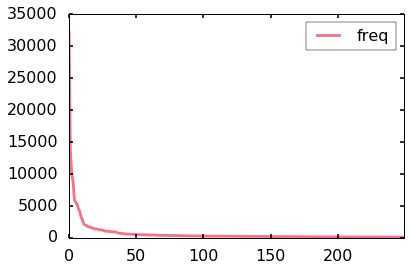

In [243]:
lemmeFilm3.groupby("lemme").first()["freq"].sort_values(ascending=False).reset_index()[:250].plot()

In [244]:
film3=verb3[(verb3["9_freqfilms2"]!=0)][["3_lemme","1_ortho","9_freqfilms2","infover"]]
film3.columns=["lemme","ortho","freq","cases"]

In [245]:
freqTableFilms=pd.pivot_table(film3, values='freq', index=['lemme'], columns=['cases'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [246]:
freqTableFilms.set_index("lemme")

cases,cnd:pre:1p;,cnd:pre:1s;,cnd:pre:1s;cnd:pre:2s;,cnd:pre:2p;,cnd:pre:2s;,cnd:pre:3p;,cnd:pre:3s;,imp:pre:1p;,imp:pre:1p;ind:imp:1p;ind:pre:1p;,imp:pre:1p;ind:pre:1p;,...,sub:imp:2s;,sub:imp:3p;,sub:imp:3s;,sub:pre:1p;,sub:pre:1s;,sub:pre:1s;sub:pre:3s;,sub:pre:2p;,sub:pre:2s;,sub:pre:3p;,sub:pre:3s;
lemme,,,,,,,,,,,,,,,,,,,,,
abaisser,NaN,NaN,0.13,NaN,NaN,0.01,0.02,0.02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abandonner,0.01,NaN,0.93,0.23,NaN,0.02,0.23,NaN,NaN,1.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abattre,NaN,NaN,0.10,0.02,NaN,0.03,0.63,NaN,NaN,0.33,...,NaN,NaN,NaN,NaN,NaN,0.58,NaN,0.11,NaN,NaN
abdiquer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abjurer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abolir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abonder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
cellOrder=[c for c in freqTableFilms.columns[1:] if not ";" in c[:-1]]+[c for c in freqTableFilms.columns[1:] if ";" in c[:-1]]
cellOrder

[u'cnd:pre:1p;',
 u'cnd:pre:1s;',
 u'cnd:pre:2p;',
 u'cnd:pre:2s;',
 u'cnd:pre:3p;',
 u'cnd:pre:3s;',
 u'imp:pre:1p;',
 u'imp:pre:2p;',
 u'imp:pre:2s;',
 u'ind:fut:1p;',
 u'ind:fut:1s;',
 u'ind:fut:2p;',
 u'ind:fut:2s;',
 u'ind:fut:3p;',
 u'ind:fut:3s;',
 u'ind:imp:1p;',
 u'ind:imp:1s;',
 u'ind:imp:2p;',
 u'ind:imp:2s;',
 u'ind:imp:3p;',
 u'ind:imp:3s;',
 u'ind:pas:1p;',
 u'ind:pas:1s;',
 u'ind:pas:2p;',
 u'ind:pas:2s;',
 u'ind:pas:3p;',
 u'ind:pas:3s;',
 u'ind:pre:1p;',
 u'ind:pre:1s;',
 u'ind:pre:2p;',
 u'ind:pre:2s;',
 u'ind:pre:3p;',
 u'ind:pre:3s;',
 u'inf;',
 u'par:pas;',
 u'par:pre;',
 u'sub:imp:1p;',
 u'sub:imp:1s;',
 u'sub:imp:2p;',
 u'sub:imp:2s;',
 u'sub:imp:3p;',
 u'sub:imp:3s;',
 u'sub:pre:1p;',
 u'sub:pre:1s;',
 u'sub:pre:2p;',
 u'sub:pre:2s;',
 u'sub:pre:3p;',
 u'sub:pre:3s;',
 u'cnd:pre:1s;cnd:pre:2s;',
 u'imp:pre:1p;ind:imp:1p;ind:pre:1p;',
 u'imp:pre:1p;ind:pre:1p;',
 u'imp:pre:1p;ind:pre:1p;inf;',
 u'imp:pre:1p;ind:pre:1p;sub:pre:2s;',
 u'imp:pre:1p;sub:pre:1p;',
 u'

In [248]:
freqTableFilms=freqTableFilms.reindex_axis(["lemme"]+cellOrder, axis=1)

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [249]:
freqTableFilms.columns=[c.strip(";") for c in freqTableFilms.columns]

In [250]:
simplesCases=freqTableFilms.sum()[1:52]
multiplesCases=freqTableFilms.sum()[52:]
refFreq=simplesCases.copy()


In [251]:
convergence=0.0000000001
boolConvergence=False
while not boolConvergence:
    curFreq=simplesCases.copy()
    for m in multiplesCases.keys():
        mCases=[c for c in m.strip(";").split(";")]
        mTotal=0
        for case in mCases:
            mTotal+=refFreq[case]
        for case in mCases:
            partCase=refFreq[case]/mTotal*multiplesCases[m]
    #        print partCase,
            curFreq[case]+=partCase
    #    print
    boolFin=True
    for case in refFreq.keys():
        if math.fabs(refFreq[case]-curFreq[case])/refFreq[case]>convergence:
            print case, refFreq[case],curFreq[case]
            boolFin=False
    #        break
    refFreq=curFreq.copy()
    if boolFin:
        boolConvergence=True
refFreqFilms=refFreq

imp:pre:1p 8.57 26.4171350451
imp:pre:2p 83.77 779.031154601
imp:pre:2s 1.98 59.4812236146
ind:fut:2s 777.85 792.872430464
ind:fut:3p 439.54 456.207292219
ind:fut:3s 2746.31 2777.59770448
ind:imp:1p 186.06 205.624187548
ind:imp:1s 23.29 3524.8661178
ind:imp:2p 390.27 567.765148422
ind:imp:2s 0.65 98.3753961601
ind:imp:3p 500.07 522.150857091
ind:imp:3s 5678.29 5790.7400657
ind:pas:1s 39.47 102.864802434
ind:pas:2s 10.23 26.3179446791
ind:pas:3p 81.23 81.3279404439
ind:pas:3s 549.1 585.408198038
ind:pre:1p 380.22 588.292812067
ind:pre:1s 4269.23 17080.2608019
ind:pre:2p 1446.42 11695.3067159
ind:pre:2s 3892.51 14552.1979853
ind:pre:3p 4388.51 5437.96010213
ind:pre:3s 32875.82 58124.6462301
inf 31556.43 34970.6349969
par:pas 22728.85 27697.2221987
sub:imp:1s 1.73 1.86456555202
sub:imp:3p 0.86 0.860574068716
sub:pre:1p 9.09 24.6784838253
sub:pre:1s 0.34 10.0886929404
sub:pre:2p 26.11 70.4132434599
sub:pre:2s 200.58 594.007024495
sub:pre:3p 75.54 93.5292123568
sub:pre:3s 408.8 1426.3587615

ind:pre:1p 534.409762951 535.366457863
ind:pre:1s 22915.8939512 22904.8575999
ind:pre:2p 11639.3837378 11620.4456548
ind:pre:2s 12718.9124216 12711.4656513
ind:pre:3p 5440.90366197 5440.90360996
ind:pre:3s 54640.5399205 54632.3120292
inf 34124.1618438 34124.1966731
par:pas 26961.4074979 26961.3096223
sub:imp:1s 1.78586957643 1.78585937287
sub:pre:1p 22.0505761625 21.9895443234
sub:pre:1s 37.6792280033 35.5667442409
sub:pre:2p 44.2357069679 44.1071116528
sub:pre:2s 495.747385701 490.891311854
sub:pre:3p 93.5616007215 93.5616009719
sub:pre:3s 1504.10061578 1504.24204213
imp:pre:1p 35.5953021865 35.7144227261
imp:pre:2p 1389.41177505 1405.55433571
imp:pre:2s 710.294384524 739.138455039
ind:fut:2s 792.551478723 792.551418019
ind:fut:3p 451.259825701 451.261046945
ind:fut:3s 2777.25247489 2777.25244482
ind:imp:1p 204.583432472 204.588476316
ind:imp:1s 3525.83438717 3525.8226176
ind:imp:2p 565.909567637 565.947646959
ind:imp:2s 98.4024195648 98.4020910881
ind:imp:3p 518.914824575 518.9148314

imp:pre:2s 883.753035495 889.741991147
ind:fut:2s 792.551287076 792.551284848
ind:fut:3p 451.266027042 451.26621626
ind:fut:3s 2777.25231696 2777.25231203
ind:imp:1p 204.609119494 204.609779716
ind:imp:1s 3525.76468894 3525.76236113
ind:imp:2p 566.107930552 566.113673305
ind:imp:2s 98.4004743584 98.4004093919
ind:imp:3p 518.91488845 518.914891138
ind:imp:3s 5782.70581132 5782.70415406
ind:pas:1s 103.031886448 103.03158264
ind:pas:2s 27.9641109854 27.9642145717
ind:pas:3p 81.323965895 81.3239658309
ind:pas:3s 576.42804328 576.428429573
ind:pre:1p 539.62211536 539.738929151
ind:pre:1s 22819.9547236 22816.7015446
ind:pre:2p 11526.1643914 11523.0630964
ind:pre:2s 12686.937159 12686.2519674
ind:pre:3p 5440.90337435 5440.90336789
ind:pre:3s 54597.8573492 54596.7735475
inf 34124.5507886 34124.5644613
par:pas 26960.4580141 26960.4248586
sub:imp:1s 1.78583833692 1.785838089
sub:pre:1p 21.732066021 21.7253907533
sub:pre:1s 15.1943012788 14.025165157
sub:pre:2p 43.546410681 43.5298509748
sub:pre:

ind:fut:2s 792.551274425 792.551274072
ind:fut:3p 451.267189666 451.267224756
ind:fut:3s 2777.25228739 2777.25228656
ind:imp:1p 204.612747821 204.612834708
ind:imp:1s 3525.75049299 3525.75007031
ind:imp:2p 566.141587746 566.142487521
ind:imp:2s 98.4000781641 98.4000663677
ind:imp:3p 518.914904942 518.914905434
ind:imp:3s 5782.69594232 5782.69567455
ind:pas:1s 103.030052067 103.029997206
ind:pas:2s 27.9647120017 27.964729181
ind:pas:3p 81.3239655032 81.3239654915
ind:pas:3s 576.430416599 576.430488224
ind:pre:1p 540.285916085 540.303075401
ind:pre:1s 22799.9965351 22799.4016343
ind:pre:2p 11507.6540164 11507.1479272
ind:pre:2s 12682.6605741 12682.5266106
ind:pre:3p 5440.9033378 5440.90333686
ind:pre:3s 54591.1685257 54590.9646554
inf 34124.6265954 34124.628065
par:pas 26960.2539804 26960.2478355
sub:imp:1s 1.7858369171 1.7858368768
sub:pre:1p 21.6951803968 21.6942851594
sub:pre:1s 6.59956335746 6.25755427186
sub:pre:2p 43.4491105079 43.4465011759
sub:pre:2s 466.622541863 466.537500369
s

ind:imp:3s 5782.69431288 5782.69427644
ind:pas:1s 103.029683417 103.029672762
ind:pas:2s 27.9648261066 27.9648293401
ind:pas:3s 576.430896467 576.430910255
ind:pre:1p 540.393702997 540.396457774
ind:pre:1s 22796.0421308 22795.9300905
ind:pre:2p 11504.55155 11504.4805864
ind:pre:2s 12681.7469775 12681.7199243
ind:pre:3s 54589.7959851 54589.7562125
inf 34124.6319921 34124.6318696
par:pas 26960.212851 26960.2116701
sub:imp:1s 1.78583664905 1.78583664144
sub:pre:1p 21.6897150379 21.6895832602
sub:pre:1s 4.07654687202 3.99276488693
sub:pre:2p 43.4331558764 43.4327920775
sub:pre:2s 466.085161197 466.071258428
sub:pre:3s 1520.53595068 1520.59451375
imp:pre:1p 36.3224335767 36.3227426673
imp:pre:2p 1504.23912215 1504.29950863
imp:pre:2s 928.451848806 928.644615412
ind:fut:3p 451.267431526 451.267437514
ind:imp:1p 204.613287351 204.613298264
ind:imp:1s 3525.74759259 3525.74752127
ind:imp:2p 566.147212425 566.147320163
ind:imp:2s 98.3999972171 98.3999952265
ind:imp:3p 518.91490831 518.914908393


par:pas 26960.2038537 26960.20367
sub:imp:1s 1.7858365913 1.78583659013
sub:pre:1p 21.6887788005 21.6887617873
sub:pre:1s 3.40749803967 3.39290132686
sub:pre:2p 43.4307941083 43.430761721
sub:pre:2s 465.983378596 465.981429623
sub:pre:3s 1521.0058914 1521.01621035
imp:pre:1p 36.3246674168 36.3247092593
imp:pre:2p 1504.63129871 1504.63667908
imp:pre:2s 929.926563586 929.956834403
ind:fut:3p 451.267477272 451.267478209
ind:imp:1p 204.613364877 204.613366286
ind:imp:1s 3525.74704883 3525.74703772
ind:imp:2p 566.147911857 566.147921449
ind:imp:2s 98.3999820411 98.3999817311
ind:imp:3s 5782.69407776 5782.69407521
ind:pas:1s 103.029600398 103.029598911
ind:pas:2s 27.9648511109 27.9648515537
ind:pas:3s 576.431003614 576.431005526
ind:pre:1p 540.414146712 540.414485376
ind:pre:1s 22795.1761964 22795.160876
ind:pre:2p 11504.0843836 11504.078949
ind:pre:2s 12681.5343536 12681.5304941
ind:pre:3s 54589.4859 54589.4803394
inf 34124.6297771 34124.6296944
par:pas 26960.20367 26960.2035059
sub:imp:1s 

imp:pre:2s 930.152688639 930.159040931
ind:fut:3p 451.267484267 451.267484463
ind:imp:1p 204.613375111 204.613375387
ind:imp:1s 3525.74696596 3525.74696364
ind:imp:2p 566.147971993 566.147973149
ind:imp:2s 98.3999797284 98.3999796635
ind:pas:1s 103.029589285 103.029588973
ind:pas:2s 27.964854412 27.9648545045
ind:pas:3s 576.431017888 576.431018289
ind:pre:1p 540.416637964 540.41670644
ind:pre:1s 22795.062 22795.0588018
ind:pre:2p 11504.0503132 11504.0496585
ind:pre:2s 12681.5054422 12681.5046268
ind:pre:3s 54589.4443434 54589.4431753
inf 34124.6290643 34124.6290399
par:pas 26960.2024442 26960.2024097
sub:imp:1s 1.78583658234 1.78583658213
sub:pre:1p 21.6886518607 21.6886488822
sub:pre:1s 3.29393746872 3.29110958621
sub:pre:2p 43.4305871441 43.4305837885
sub:pre:2s 465.968646943 465.968294605
sub:pre:3s 1521.08627456 1521.0882797
imp:pre:1p 36.3249819984 36.3249894635
imp:pre:2p 1504.6656816 1504.66623906
imp:pre:2s 930.159040931 930.164728217
ind:fut:3p 451.267484463 451.267484639
ind:

ind:pas:2s 27.9648551079 27.9648551276
ind:pas:3s 576.431020905 576.431020991
ind:pre:1p 540.417150678 540.417165129
ind:pre:1s 22795.0379378 22795.0372552
ind:pre:2p 11504.0462096 11504.0461308
ind:pre:2s 12681.4992969 12681.4991221
ind:pre:3s 54589.4355464 54589.4352965
inf 34124.6288684 34124.6288623
par:pas 26960.2021847 26960.2021773
sub:pre:1p 21.6886296427 21.6886290198
sub:pre:1s 3.27255402951 3.27194318933
sub:pre:2p 43.4305661063 43.430565702
sub:pre:2s 465.966006877 465.965932395
sub:pre:3s 1521.10144247 1521.10187598
imp:pre:1p 36.3250378324 36.3250394036
imp:pre:2p 1504.66917655 1504.66924371
imp:pre:2s 930.201876282 930.203093359
ind:imp:1p 204.613377227 204.613377278
ind:imp:1s 3525.74694797 3525.74694753
ind:imp:2p 566.14797938 566.147979499
ind:imp:2s 98.3999792263 98.3999792139
ind:pas:1s 103.029586867 103.029586807
ind:pas:2s 27.9648551276 27.9648551453
ind:pas:3s 576.431020991 576.431021068
ind:pre:1p 540.417165129 540.417178069
ind:pre:1s 22795.0372552 22795.036643

ind:pre:2s 12681.4978238 12681.4978021
ind:pre:3s 54589.4334409 54589.4334098
sub:pre:1p 21.6886244143 21.6886243374
sub:pre:1s 3.26739910377 3.26732278987
sub:pre:2p 43.4305633879 43.4305633651
sub:pre:2s 465.965380571 465.965371344
sub:pre:3s 1521.10510139 1521.10515557
imp:pre:1p 36.3250510347 36.325051229
imp:pre:2p 1504.66962809 1504.66963189
imp:pre:2s 930.21213145 930.212282948
ind:pre:1p 540.41727394 540.417275543
ind:pre:1s 22795.0321033 22795.0320273
ind:pre:2p 11504.0456756 11504.0456717
ind:pre:2s 12681.4978021 12681.4977826
ind:pre:3s 54589.4334098 54589.4333819
sub:pre:1p 21.6886243374 21.6886242686
sub:pre:1s 3.26732278987 3.26725438939
sub:pre:2p 43.4305633651 43.4305633454
sub:pre:2s 465.965371344 465.965363076
sub:pre:3s 1521.10515557 1521.10520413
imp:pre:1p 36.325051229 36.3250514031
imp:pre:2p 1504.66963189 1504.66963515
imp:pre:2s 930.212282948 930.212418726
ind:pre:1p 540.417275543 540.41727698
ind:pre:1s 22795.0320273 22795.0319591
ind:pre:2p 11504.0456717 11504

ind:pre:1p 540.417286984 540.417287233
ind:pre:1s 22795.031484 22795.0314722
ind:pre:2s 12681.4976432 12681.4976402
sub:pre:1p 21.6886237774 21.6886237667
sub:pre:1s 3.2667657392 3.26675510274
sub:pre:2s 465.965304058 465.965302775
sub:pre:3s 1521.10555105 1521.1055586
imp:pre:1p 36.3250526456 36.3250526726
imp:pre:2p 1504.66965335 1504.6696536
imp:pre:2s 930.213388374 930.213409472
ind:pre:1p 540.417287233 540.417287456
ind:pre:1s 22795.0314722 22795.0314616
ind:pre:2s 12681.4976402 12681.4976375
sub:pre:1p 21.6886237667 21.6886237571
sub:pre:1s 3.26675510274 3.26674556925
sub:pre:2s 465.965302775 465.965301624
sub:pre:3s 1521.1055586 1521.10556537
imp:pre:1p 36.3250526726 36.3250526969
imp:pre:2p 1504.6696536 1504.66965381
imp:pre:2s 930.213409472 930.213428382
ind:pre:1p 540.417287456 540.417287656
ind:pre:1s 22795.0314616 22795.0314521
ind:pre:2s 12681.4976375 12681.497635
sub:pre:1p 21.6886237571 21.6886237486
sub:pre:1s 3.26674556925 3.26673702435
sub:pre:2s 465.965301624 465.965

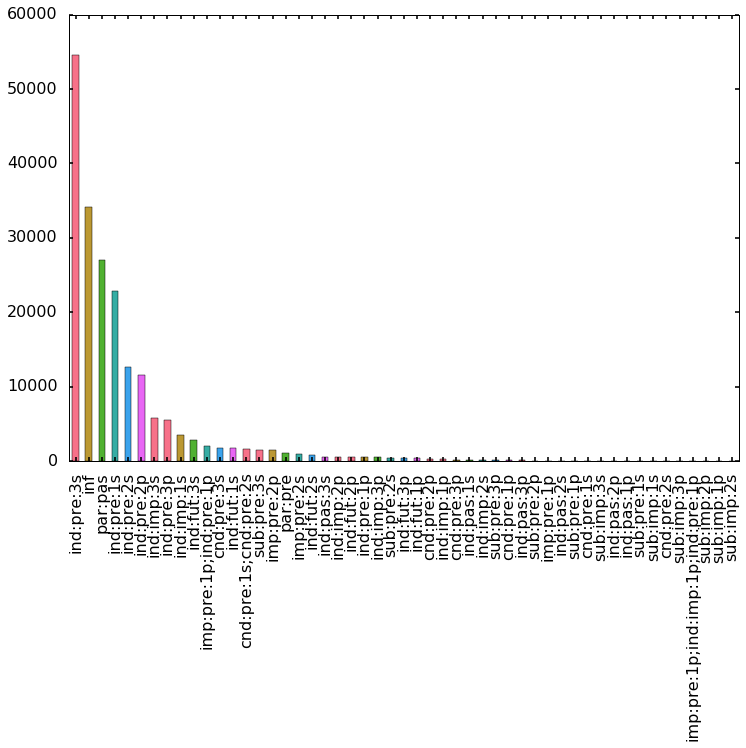

In [252]:
refFreqFilms.sort_values(ascending=False).plot(kind="bar",figsize=(12,8))

### Pour Frantext

In [253]:
lemmeFrantext3=verb3[(verb3["8_freqlemlivres"]!=0)][["3_lemme","1_ortho","8_freqlemlivres"]]
lemmeFrantext3.columns=["lemme","ortho","freq"]

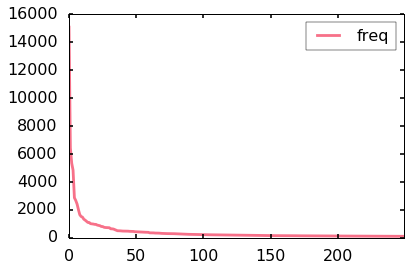

In [254]:
lemmeFrantext3.groupby("lemme").first()["freq"].sort_values(ascending=False).reset_index()[:250].plot()

In [255]:
frantext3=verb3[(verb3["10_freqlivres"]!=0)][["3_lemme","1_ortho","10_freqlivres","infover"]]
frantext3.columns=["lemme","ortho","freq","cases"]

In [256]:
freqTableTexte=pd.pivot_table(frantext3, values='freq', index=['lemme'], columns=['cases'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [257]:
freqTableTexte.set_index("lemme")

cases,cnd:pre:1p;,cnd:pre:1s;,cnd:pre:1s;cnd:pre:2s;,cnd:pre:2p;,cnd:pre:2s;,cnd:pre:3p;,cnd:pre:3s;,imp:pre:1p;,imp:pre:1p;ind:imp:1p;ind:pre:1p;,imp:pre:1p;ind:pre:1p;,...,sub:imp:2s;,sub:imp:3p;,sub:imp:3s;,sub:pre:1p;,sub:pre:1s;,sub:pre:1s;sub:pre:3s;,sub:pre:2p;,sub:pre:2s;,sub:pre:3p;,sub:pre:3s;
lemme,,,,,,,,,,,,,,,,,,,,,
abaisser,NaN,NaN,NaN,NaN,NaN,0.07,0.20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abandonner,NaN,NaN,0.27,0.20,NaN,0.14,0.88,NaN,NaN,0.68,...,NaN,NaN,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abattre,NaN,NaN,0.07,NaN,NaN,0.07,0.41,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.61,NaN,NaN,NaN,NaN
abdiquer,NaN,0.07,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aberrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abjurer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abolir,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
cellOrder=[c for c in freqTableTexte.columns[1:] if not ";" in c[:-1]]+[c for c in freqTableTexte.columns[1:] if ";" in c[:-1]]
cellOrder

[u'cnd:pre:1p;',
 u'cnd:pre:1s;',
 u'cnd:pre:2p;',
 u'cnd:pre:2s;',
 u'cnd:pre:3p;',
 u'cnd:pre:3s;',
 u'imp:pre:1p;',
 u'imp:pre:2p;',
 u'imp:pre:2s;',
 u'ind:fut:1p;',
 u'ind:fut:1s;',
 u'ind:fut:2p;',
 u'ind:fut:2s;',
 u'ind:fut:3p;',
 u'ind:fut:3s;',
 u'ind:imp:1p;',
 u'ind:imp:1s;',
 u'ind:imp:2p;',
 u'ind:imp:2s;',
 u'ind:imp:3p;',
 u'ind:imp:3s;',
 u'ind:pas:1p;',
 u'ind:pas:1s;',
 u'ind:pas:2p;',
 u'ind:pas:2s;',
 u'ind:pas:3p;',
 u'ind:pas:3s;',
 u'ind:pre:1p;',
 u'ind:pre:1s;',
 u'ind:pre:2p;',
 u'ind:pre:2s;',
 u'ind:pre:3p;',
 u'ind:pre:3s;',
 u'inf;',
 u'par:pas;',
 u'par:pre;',
 u'sub:imp:1p;',
 u'sub:imp:1s;',
 u'sub:imp:2p;',
 u'sub:imp:2s;',
 u'sub:imp:3p;',
 u'sub:imp:3s;',
 u'sub:pre:1p;',
 u'sub:pre:1s;',
 u'sub:pre:2p;',
 u'sub:pre:2s;',
 u'sub:pre:3p;',
 u'sub:pre:3s;',
 u'cnd:pre:1s;cnd:pre:2s;',
 u'imp:pre:1p;ind:imp:1p;ind:pre:1p;',
 u'imp:pre:1p;ind:pre:1p;',
 u'imp:pre:1p;ind:pre:1p;inf;',
 u'imp:pre:1p;ind:pre:1p;sub:pre:2s;',
 u'imp:pre:1p;sub:pre:1p;',
 u'

In [259]:
freqTableTexte=freqTableTexte.reindex_axis(["lemme"]+cellOrder, axis=1)

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [260]:
freqTableTexte.columns=[c.strip(";") for c in freqTableTexte.columns]

In [261]:
simplesCases=freqTableTexte.sum()[1:52]
multiplesCases=freqTableTexte.sum()[52:]
refFreq=simplesCases.copy()

In [262]:
convergence=0.0000000001
boolConvergence=False
while not boolConvergence:
    curFreq=simplesCases.copy()
    for m in multiplesCases.keys():
        mCases=[c for c in m.strip(";").split(";")]
        mTotal=0
        for case in mCases:
            mTotal+=refFreq[case]
        for case in mCases:
            partCase=refFreq[case]/mTotal*multiplesCases[m]
    #        print partCase,
            curFreq[case]+=partCase
    #    print
    boolFin=True
    for case in refFreq.keys():
        if math.fabs(refFreq[case]-curFreq[case])/refFreq[case]>convergence:
            print case, refFreq[case],curFreq[case]
            boolFin=False
    #        break
    refFreq=curFreq.copy()
    if boolFin:
        boolConvergence=True
refFreqTexte=refFreq

imp:pre:1p 7.99 19.9406541775
imp:pre:2p 21.23 147.163008578
imp:pre:2s 1.4 17.2874247132
ind:fut:2s 236.61 241.064817261
ind:fut:3p 247.82 262.051433621
ind:fut:3s 1075.49 1077.46447486
ind:imp:1p 546.77 596.310193715
ind:imp:1s 169.77 3379.02727019
ind:imp:2p 115.12 155.299247338
ind:imp:2s 1.05 20.8987373134
ind:imp:3p 4086.82 4383.17730241
ind:imp:3s 20665.92 20923.0834068
ind:pas:1s 839.53 1182.22352488
ind:pas:2s 7.18 12.6864070269
ind:pas:3p 1085.52 1086.01453102
ind:pas:3s 9582.42 10523.2173334
ind:pre:1p 130.79 231.896921247
ind:pre:1s 948.93 4520.98799338
ind:pre:2p 331.71 1985.86520904
ind:pre:2s 635.94 2561.58024608
ind:pre:3p 3649.25 4664.51207882
ind:pre:3s 12580.95 25799.9646696
inf 25634.3 27509.8861483
par:pas 22892.29 27708.3417354
sub:imp:1s 17.12 26.5166677495
sub:imp:3p 44.24 44.2910255612
sub:pre:1p 6.62 12.5837481582
sub:pre:1s 1.11 12.959985308
sub:pre:2p 7.91 18.4097403078
sub:pre:2s 43.41 133.586966083
sub:pre:3p 72.77 92.8639005478
sub:pre:3s 229.76 887.57319

ind:imp:3s 20911.6929829 20911.6902889
ind:pas:1s 1070.6402898 1070.58977501
ind:pas:2s 14.6056393923 14.6064728466
ind:pas:3p 1085.98426535 1085.98425906
ind:pas:3s 10282.4175845 10282.5180655
ind:pre:1p 209.751661604 210.066062851
ind:pre:1s 6992.35645886 6989.88943384
ind:pre:2p 1982.27443977 1979.99582176
ind:pre:2s 1898.04502658 1895.19139961
ind:pre:3p 4689.30283407 4689.30281669
ind:pre:3s 24657.5255649 24652.9442335
inf 27407.5573974 27407.5944401
par:pas 27232.4561854 27232.5879891
sub:imp:1s 25.6029931036 25.602543985
sub:pre:1p 11.2344703952 11.2263901137
sub:pre:1s 31.1900618491 29.3652861474
sub:pre:2p 12.6473426153 12.617090657
sub:pre:2s 127.64319377 126.510170679
sub:pre:3p 93.3075324376 93.3075326644
sub:pre:3s 949.346440743 949.979603819
imp:pre:1p 24.7087725628 24.7518991844
imp:pre:2p 235.878971712 237.686462617
imp:pre:2s 175.390904211 186.345380833
ind:fut:2s 240.93765746 240.937643317
ind:fut:3p 258.596152592 258.596951204
ind:fut:3s 1077.34542951 1077.34541638
i

ind:fut:3p 258.600139197 258.600243835
ind:fut:3s 1077.34537311 1077.34537188
ind:imp:1p 595.98684287 595.986973556
ind:imp:1s 3381.5509816 3381.55079862
ind:imp:2p 154.850976776 154.851397223
ind:imp:2s 20.9143460604 20.9143449287
ind:imp:3p 4356.75551904 4356.75552253
ind:imp:3s 20911.6787462 20911.6786554
ind:pas:1s 1070.38517541 1070.37971198
ind:pas:2s 14.6078197946 14.6078392666
ind:pas:3p 1085.98424152 1085.98424111
ind:pas:3s 10282.8567673 10282.8655264
ind:pre:1p 212.067343484 212.125063486
ind:pre:1s 6942.62703105 6940.71137831
ind:pre:2p 1970.8036128 1970.68031234
ind:pre:2s 1884.77154723 1884.49538475
ind:pre:3p 4689.30266669 4689.30266206
ind:pre:3s 24634.5038566 24633.9897703
inf 27407.7369938 27407.7365355
par:pas 27232.5806784 27232.5731664
sub:imp:1s 25.6018836547 25.6018745542
sub:pre:1p 11.1772743475 11.1758571353
sub:pre:1s 12.1326569107 11.5270005542
sub:pre:2p 12.5053561858 12.503955269
sub:pre:2s 119.602911792 119.407969618
sub:pre:3p 93.3075336167 93.3075336398


ind:pas:2s 14.6079488824 14.6079531481
ind:pas:3s 10282.9153265 10282.9172808
ind:pre:1p 212.447384432 212.460030739
ind:pre:1s 6929.59364936 6929.14738777
ind:pre:2p 1970.20240537 1970.19232527
ind:pre:2s 1882.9375661 1882.87691844
ind:pre:3p 4689.30263612 4689.3026351
ind:pre:3s 24631.0855803 24630.9723798
inf 27407.7267425 27407.7260768
par:pas 27232.5290753 27232.5272754
sub:imp:1s 25.6018237963 25.6018218762
sub:pre:1p 11.1679700312 11.1676605284
sub:pre:1s 8.26211302979 8.14461489191
sub:pre:2p 12.4985469362 12.4984331988
sub:pre:2s 118.323430912 118.281076025
sub:pre:3s 962.026853652 962.101130057
imp:pre:1p 25.0681700307 25.0698399808
imp:pre:2p 245.446244003 245.454228694
imp:pre:2s 285.148178717 285.757500796
ind:fut:2s 240.93761828 240.937618208
ind:fut:3p 258.600862173 258.600882672
ind:fut:3s 1077.34536473 1077.34536449
ind:imp:1p 595.987729082 595.987754215
ind:imp:1s 3381.54969784 3381.54966045
ind:imp:2p 154.853052979 154.853080636
ind:imp:2s 20.9143381206 20.9143378893

ind:pre:2s 1882.53564704 1882.52489931
ind:pre:3s 24630.3351868 24630.3151129
inf 27407.7217601 27407.7216041
par:pas 27232.516908 27232.5165717
sub:imp:1s 25.6018113158 25.6018109943
sub:pre:1p 11.1658861649 11.1658285704
sub:pre:1s 7.51539374418 7.49694267005
sub:pre:2p 12.4979832705 12.4979757307
sub:pre:2s 118.039621562 118.03185244
sub:pre:3s 962.492405119 962.503556578
imp:pre:1p 25.079377876 25.0796855597
imp:pre:2p 245.485823548 245.486353054
imp:pre:2s 289.203934607 289.313200022
ind:fut:3p 258.60099811 258.601001749
ind:imp:1p 595.987898299 595.987902976
ind:imp:1s 3381.54944724 3381.54944041
ind:imp:2p 154.853190043 154.853191877
ind:imp:2s 20.9143365707 20.9143365284
ind:imp:3s 20911.6786446 20911.6786481
ind:pas:1s 1070.34120271 1070.34102069
ind:pas:2s 14.6079779064 14.6079785669
ind:pas:3s 10282.9286555 10282.9289599
ind:pre:1p 212.534622572 212.536666035
ind:pre:1s 6926.5231716 6926.45203116
ind:pre:2p 1970.15178292 1970.15124112
ind:pre:2s 1882.52489931 1882.51550726
i

sub:pre:3s 962.565628986 962.566908617
imp:pre:1p 25.0815135999 25.0815550843
imp:pre:2p 245.488510526 245.488533588
imp:pre:2s 289.955758744 289.970124934
ind:fut:3p 258.601023091 258.601023567
ind:imp:1p 595.987930861 595.987931497
ind:imp:1s 3381.54940004 3381.54939913
ind:imp:2p 154.853199348 154.853199428
ind:imp:2s 20.9143362788 20.9143362731
ind:pas:1s 1070.33995384 1070.33993009
ind:pas:2s 14.6079824375 14.6079825236
ind:pas:3s 10282.9307453 10282.9307851
ind:pre:1p 212.548793636 212.549068422
ind:pre:1s 6926.03279257 6926.023394
ind:pre:2p 1970.1490357 1970.14901221
ind:pre:2s 1882.46048012 1882.45925595
ind:pre:3s 24630.1947782 24630.192491
inf 27407.7206254 27407.7206058
par:pas 27232.5145293 27232.5144898
sub:imp:1s 25.6018091012 25.6018090661
sub:pre:1p 11.1654773492 11.1654705032
sub:pre:1s 7.39031355056 7.38839388895
sub:pre:2p 12.497944676 12.4979444094
sub:pre:2s 117.984706787 117.983794369
sub:pre:3s 962.566908617 962.568017972
imp:pre:1p 25.0815550843 25.0815913312
i

par:pas 27232.5142712 27232.5142644
sub:imp:1s 25.6018088749 25.601808869
sub:pre:1p 11.1654325319 11.165431355
sub:pre:1s 7.37801000837 7.37769870028
sub:pre:2p 12.4979433564 12.4979433389
sub:pre:2s 117.97874494 117.9785889
sub:pre:3s 962.573962568 962.574138489
imp:pre:1p 25.0817920369 25.0817982437
imp:pre:2p 245.488626138 245.488627366
imp:pre:2s 290.051732161 290.053853959
ind:fut:3p 258.601026264 258.601026334
ind:imp:1p 595.987935136 595.987935232
ind:pas:1s 1070.33979535 1070.33979186
ind:pas:2s 14.607983012 14.6079830247
ind:pas:3s 10282.9310107 10282.9310166
ind:pre:1p 212.550637053 212.55067811
ind:pre:1s 6925.96995878 6925.96856787
ind:pre:2p 1970.14891818 1970.14891695
ind:pre:2s 1882.45231384 1882.45213376
ind:pre:3s 24630.1795195 24630.1791829
inf 27407.7204932 27407.7204903
par:pas 27232.5142644 27232.5142585
sub:imp:1s 25.601808869 25.601808864
sub:pre:1p 11.165431355 11.165430328
sub:pre:1s 7.37769870028 7.37742789552
sub:pre:2p 12.4979433389 12.4979433247
sub:pre:2s

sub:pre:3s 962.575199165 962.575213354
imp:pre:1p 25.081836488 25.0818370167
imp:pre:2p 245.48863246 245.488632487
imp:pre:2s 290.066885455 290.067064737
ind:pas:1s 1070.33977039 1070.3397701
ind:pre:1p 212.550931007 212.550934502
ind:pre:1s 6925.96002116 6925.9599035
ind:pre:2s 1882.45102877 1882.45101359
ind:pre:3s 24630.1771179 24630.1770895
sub:pre:1p 11.1654239953 11.1654239076
sub:pre:1s 7.37578385487 7.37576162759
sub:pre:2s 117.977614485 117.977602908
sub:pre:3s 962.575213354 962.5752257
imp:pre:1p 25.0818370167 25.0818374776
imp:pre:2s 290.067064737 290.067220985
ind:pas:1s 1070.3397701 1070.33976984
ind:pre:1p 212.550934502 212.550937548
ind:pre:1s 6925.9599035 6925.95980095
ind:pre:2s 1882.45101359 1882.45100036
ind:pre:3s 24630.1770895 24630.1770648
sub:pre:1p 11.1654239076 11.1654238312
sub:pre:1s 7.37576162759 7.37574227554
sub:pre:2s 117.977602908 117.977592817
sub:pre:3s 962.5752257 962.575236442
imp:pre:1p 25.0818374776 25.0818378793
imp:pre:2s 290.067220985 290.067357

sub:pre:1s 7.37562007704 7.37561901641
sub:pre:2s 117.977528694 117.977528132
sub:pre:3s 962.575304079 962.575304663
imp:pre:1p 25.0818404327 25.0818404551
imp:pre:2s 290.068221374 290.068228936
ind:pre:1p 212.550957076 212.550957224
ind:pre:1s 6925.95914421 6925.95913925
ind:pre:2s 1882.45091569 1882.45091505
sub:pre:1p 11.1654233413 11.1654233375
sub:pre:1s 7.37561901641 7.3756180926
sub:pre:2s 117.977528132 117.977527642
sub:pre:3s 962.575304663 962.575305172
imp:pre:1p 25.0818404551 25.0818404746
imp:pre:2s 290.068228936 290.068235525
ind:pre:1p 212.550957224 212.550957352
ind:pre:1s 6925.95913925 6925.95913492
ind:pre:2s 1882.45091505 1882.4509145
sub:pre:1p 11.1654233375 11.1654233343
sub:pre:1s 7.3756180926 7.37561728795
sub:pre:2s 117.977527642 117.977527215
sub:pre:3s 962.575305172 962.575305615
imp:pre:1p 25.0818404746 25.0818404916
imp:pre:2s 290.068235525 290.068241266
ind:pre:1p 212.550957352 212.550957465
ind:pre:1s 6925.95913492 6925.95913115
ind:pre:2s 1882.4509145 1882

In [263]:
refFrequencies=pd.DataFrame(refFreqFilms,columns=["films"])
refFrequencies["textes"]=refFreqTexte

In [264]:
refFrequencies

,films,textes
cnd:pre:1p,90.64,60.55
cnd:pre:1s,15.63,24.45
cnd:pre:2p,314.95,71.81
cnd:pre:2s,1.45,1.19
cnd:pre:3p,162.75,304.61
cnd:pre:3s,1809.05,1848.44
imp:pre:1p,36.3251,25.0818
imp:pre:2p,1504.67,245.489
imp:pre:2s,930.214,290.068
ind:fut:1p,332.84,144.56


In [265]:
if saveFiles: refFrequencies.to_csv(path_or_buf=nomRepertoire+"Verbes3-FrequencesCases.csv",
                      encoding="utf8",sep="\t")

In [266]:
"""https://github.com/cognoma/genes/blob/721204091a96e55de6dcad165d6d8265e67e2a48/2.process.py#L61-L95"""

def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.
    
    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row
    
    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [267]:
film3["case"]=film3["cases"].str[:-1]

In [268]:
splitFilm3=tidy_split(film3, "case", sep=';', keep=False)
splitFilm3

,lemme,ortho,freq,cases,case
2,avoir,a,5498.34,ind:pre:3s;,ind:pre:3s
19,abaisser,abaissai,0.10,ind:pas:1s;,ind:pas:1s
21,abaisser,abaissait,0.02,ind:imp:3s;,ind:imp:3s
23,abaisser,abaissant,0.01,par:pre;,par:pre
26,abaisser,abaisse,1.28,imp:pre:2s;ind:pre:1s;ind:pre:3s;,imp:pre:2s
26,abaisser,abaisse,1.28,imp:pre:2s;ind:pre:1s;ind:pre:3s;,ind:pre:1s
26,abaisser,abaisse,1.28,imp:pre:2s;ind:pre:1s;ind:pre:3s;,ind:pre:3s
29,abaisser,abaissent,0.05,ind:pre:3p;,ind:pre:3p
30,abaisser,abaisser,1.09,inf;,inf
31,abaisser,abaissera,0.19,ind:fut:3s;,ind:fut:3s


In [269]:
def relativeFreqs(case,cases):
    totalFreq=sum([refFreq[c] for c in cases])
    result={}
    for c in cases:
        result[c]=float(refFreq[c])/totalFreq
#    print result,result[case]
    return result[case]

def repartitionFreqCases(row):
    cases=row["cases"][:-1].split(";")
    case=row["case"]
#    print case
    if len(cases)>1:
        relFreqCase=relativeFreqs(case,cases)
        return relFreqCase*row["freq"]
    else:
        return row["freq"]

In [270]:
splitFilm3["relFreq"]=splitFilm3.apply(repartitionFreqCases,axis=1)

In [271]:
zipfFilm3=splitFilm3["relFreq"].sort_values(ascending=False).reset_index()
zipfFilm3["Verbs Lex3 FxR"]=zipfFilm3["relFreq"]*(zipfFilm3.index+1)
zipfConst=zipfFilm3["Verbs Lex3 FxR"].mean()
#zipfFilm3["FR1"]=zipfFilm3["relFreq"]*(zipfFilm3.index+1)
#zipfFilm3["FR2"]=zipfFilm3["relFreq"]*np.log(zipfFilm3.index+1)*zipfConst

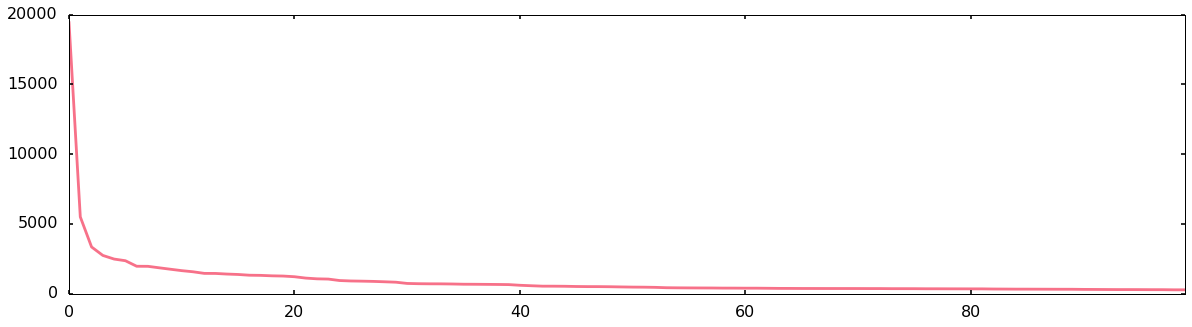

In [272]:
splitFilm3["relFreq"].sort_values(ascending=False).reset_index()["relFreq"][:100].plot(figsize=(20,5))

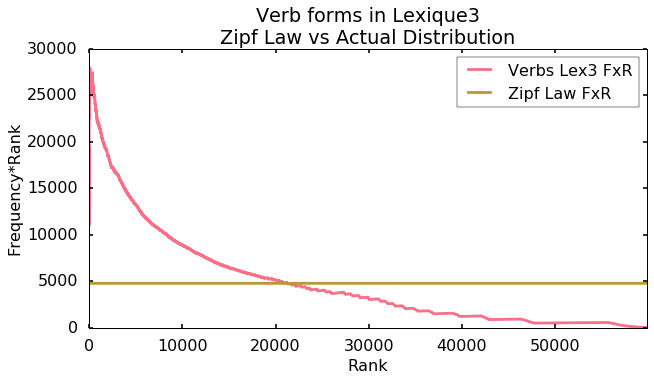

In [273]:
zipfFilm3["Zipf Law FxR"]=zipfConst
ax=zipfFilm3[["Verbs Lex3 FxR","Zipf Law FxR"]].plot(figsize=(10,5),title="Verb forms in Lexique3\nZipf Law vs Actual Distribution")
ax.set_xlabel("Rank",fontsize=16)
ax.set_ylabel("Frequency*Rank",fontsize=16)

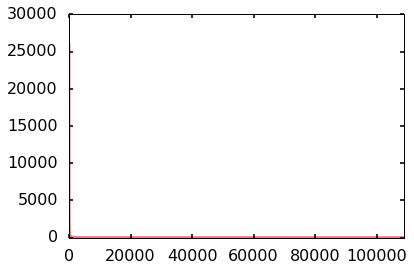

In [274]:
Lexique3[Lexique3["9_freqfilms2"]!=0]["9_freqfilms2"].sort_values(ascending=False).reset_index()["9_freqfilms2"].plot()

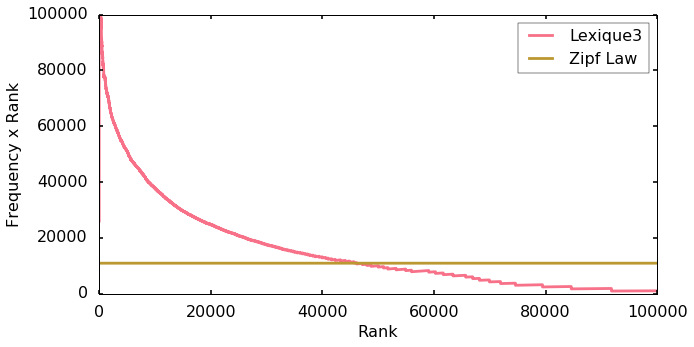

In [275]:
Lexique3["relFreq"]=Lexique3["9_freqfilms2"]
zipfLexique3=Lexique3["relFreq"].sort_values(ascending=False).reset_index()
zipfLexique3["Lexique3"]=zipfLexique3["relFreq"]*(zipfLexique3.index+1)
zipfConst=zipfLexique3["Lexique3"].mean()
zipfLexique3["Zipf Law"]=zipfConst
ax=zipfLexique3[["Lexique3","Zipf Law"]][:100000].plot(figsize=(10,5))
ax.set(xlim=(0,100000),ylim=(0,100000))
ax.set_xlabel("Rank",fontsize=16)
ax.set_ylabel("Frequency x Rank",fontsize=16)

# Calcul pour émergence-convergence (Morphology17)
## Intégration des -able dans Verbes3

In [276]:
nomVerbes3="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/MGC-171229-Verbes3.pkl"
with open(nomVerbes3,"rb") as inFile:
#    verbes3=pickle.load(inFile)
#
# pickle.load => pd.read_pickle
#
    verbes3=pd.read_pickle(inFile)

In [277]:
lstVerbes3=list(set(verbes3["lexeme"].tolist()))

In [278]:
dfVerbes3Join=verbes3.loc[verbes3["freq"]>1000000,["lexeme","case","ortho"]]

In [279]:
dfVerbes3Join

,lexeme,case,ortho
40,avoir,pi3S,a
45,abaisser,ai3S,abaissa
46,abaisser,ai1S,abaissai
47,abaisser,ii3P,abaissaient
50,abaisser,ii3S,abaissait
52,abaisser,pP,abaissant
64,abaisser,pi1S,abaisse
66,abaisser,pI2S,abaisse
67,abaisser,pi3S,abaisse
71,abaisser,pi3P,abaissent


In [280]:
dfAble=Lexique3[(Lexique3["4_cgram"]=="ADJ") & (Lexique3["3_lemme"].str.endswith("ble"))][["1_ortho","3_lemme","5_genre","6_nombre","9_freqfilms2","10_freqlivres"]]

In [281]:
dfAble["5_genre"]=dfAble["5_genre"].fillna(value="mf")

In [282]:
dfAble["freq"]=dfAble["9_freqfilms2"]+dfAble["10_freqlivres"]
dfAble["case"]=dfAble["5_genre"]+dfAble["6_nombre"]

In [283]:
sAble=dfAble.groupby("3_lemme")["freq"].sum()

In [284]:
sAble[sAble.index.str.endswith('uble')].sort_values(ascending=False)

3_lemme
double          89.45
trouble         20.32
meuble           3.35
insoluble        2.85
immeuble         2.43
indissoluble     1.08
soluble          0.75
résoluble        0.03
Name: freq, dtype: float64

In [285]:
dfVAble=sAble.to_frame(name="freq")

In [286]:
dfVAble["verbe"]=dfVAble.index.str[:-4]+"er"

In [287]:
if saveFiles: dfVAble.to_csv(path_or_buf="TEMP.csv",encoding="utf8",sep=";")

In [288]:
if saveFiles: dfVAble=pd.DataFrame.from_csv(path="TEMP.csv",encoding="utf8",sep=";")

In [289]:
dfVAbleJoin=dfVAble.reset_index()

In [290]:
dfVAbleJoin.columns=["ortho","freq","lexeme"]

In [291]:
dfVAbleJoin["case"]=u"=> able"
dfVAbleJoin

,ortho,freq,lexeme,case
0,abominable,16.62,abominer,=> able
1,abordable,0.67,aborder,=> able
2,absorbable,0.07,absorber,=> able
3,acceptable,8.36,accepter,=> able
4,accessible,7.80,accesser,=> able
5,achetable,0.14,acheter,=> able
6,adaptable,0.30,adapter,=> able
7,admirable,38.07,admirer,=> able
8,admissible,1.10,admisser,=> able
9,adoptable,0.07,adopter,=> able


In [292]:
dfForms=dfVerbes3Join.append(dfVAbleJoin).reset_index(drop=True)

In [293]:
dfParadigmes=dfForms.pivot_table(values='ortho', index=['lexeme'], columns=['case'], aggfunc=lambda x: ",".join(x)).reset_index().reindex()

In [294]:
dfParadigmes.set_index("lexeme")

case,=> able,ai1P,ai1S,ai2P,ai2S,ai3P,ai3S,fi1P,fi1S,fi2P,...,ppFP,ppFS,ppMP,ppMS,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S
lexeme,,,,,,,,,,,,,,,,,,,,,
abaisser,NaN,NaN,abaissai,NaN,NaN,abaissèrent,abaissa,NaN,abaisserai,NaN,...,abaissées,abaissée,abaissés,abaissé,NaN,NaN,NaN,NaN,NaN,NaN
abandonner,NaN,abandonnâmes,abandonnai,NaN,abandonnas,abandonnèrent,abandonna,abandonnerons,abandonnerai,abandonnerez,...,abandonnées,abandonnée,abandonnés,abandonné,NaN,NaN,NaN,abandonnes,abandonnent,abandonne
abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,abasourdie,abasourdis,abasourdi,NaN,NaN,NaN,NaN,NaN,NaN
abattre,NaN,NaN,abattis,NaN,NaN,abattirent,abattit,abattrons,abattrai,abattrez,...,abattues,abattue,abattus,abattu,NaN,NaN,NaN,abattes,NaN,abatte
abdiquer,NaN,NaN,abdiquai,NaN,NaN,NaN,abdiqua,NaN,NaN,NaN,...,NaN,abdiquée,NaN,abdiqué,NaN,NaN,NaN,NaN,NaN,NaN
aberrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,abhorrée,abhorrés,abhorré,NaN,NaN,NaN,NaN,NaN,NaN
abjurer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,abjuré,NaN,NaN,NaN,NaN,NaN,NaN
abolir,NaN,NaN,NaN,NaN,NaN,NaN,abolit,NaN,NaN,NaN,...,abolies,abolie,abolis,aboli,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
def tableauPaires(paradigme):
    table=pd.DataFrame(columns=["ligne","colonne","nbPaires"])
    refCases=paradigme.columns.tolist()
    refCases.remove("lexeme")
    for n,paire in enumerate(it.combinations_with_replacement(refCases,2)):
        if paire[0] in paradigme.columns and paire[1] in paradigme.columns:
            nbPaires=len(paradigme[[paire[0],paire[1]]].dropna())
        else:
            nbPaires=0
        table.loc[2*n]=[paire[0],paire[1],nbPaires]
        table.loc[2*n+1]=[paire[1],paire[0],nbPaires]
    table["nbPaires"]=table["nbPaires"].astype(int)
    tableau=table.pivot_table(index="ligne",columns=["colonne"])
    return tableau

In [296]:
def sortCellFrequency(df):
    return pd.Series(np.diag(df),index=df.index).sort_values(ascending=False).index.tolist()

In [297]:
df=tableauPaires(dfParadigmes)["nbPaires"]

In [306]:
np.diag(df).sum()

16194

In [299]:
def heatmap(df):
    fig, ax = plt.subplots(figsize=(60,50))
#    ax.set_ylabel('Cells sorted by decreasing frequency')    
#    ax.set_xlabel('Cells sorted by decreasing frequency')
    sns.heatmap(df,cmap="Oranges",norm=norm,annot=True,fmt="g",cbar_kws={"ticks":bounds},ax=ax,cbar=True)
    return

In [300]:
#bounds = np.array([0, 3, 10, 30, 100, 300, 1000, 3000, 5000])
bounds = np.array([0,30,300,2000,5000])
norm = mplt.colors.BoundaryNorm(boundaries=bounds, ncolors=100)

[u'inf', u'ppMS', u'pi3S', u'ii3S', u'ppFS', u'pP', u'ppMP', u'pi3P', u'pi1S', u'ii3P', u'ai3S', u'ppFP', u'pi2P', u'ii1S', u'pI2S', u'pi2S', u'pI2P', u'fi3S', u'pc3S', u'ai3P', u'pi1P', u'fi1S', u'ai1S', u'fi3P', u'pI1P', u'pc1S', u'ii1P', u'pc3P', u'is3S', u'ii2P', u'fi2P', u'fi2S', u'fi1P', u'=> able', u'ps3S', u'ii2S', u'pc2S', u'ps2S', u'ai1P', u'pc2P', u'pc1P', u'is3P', u'ps1S', u'ai2S', u'ps3P', u'is1S', u'ps2P', u'ps1P', u'ai2P', u'is2S', u'is1P', u'is2P']


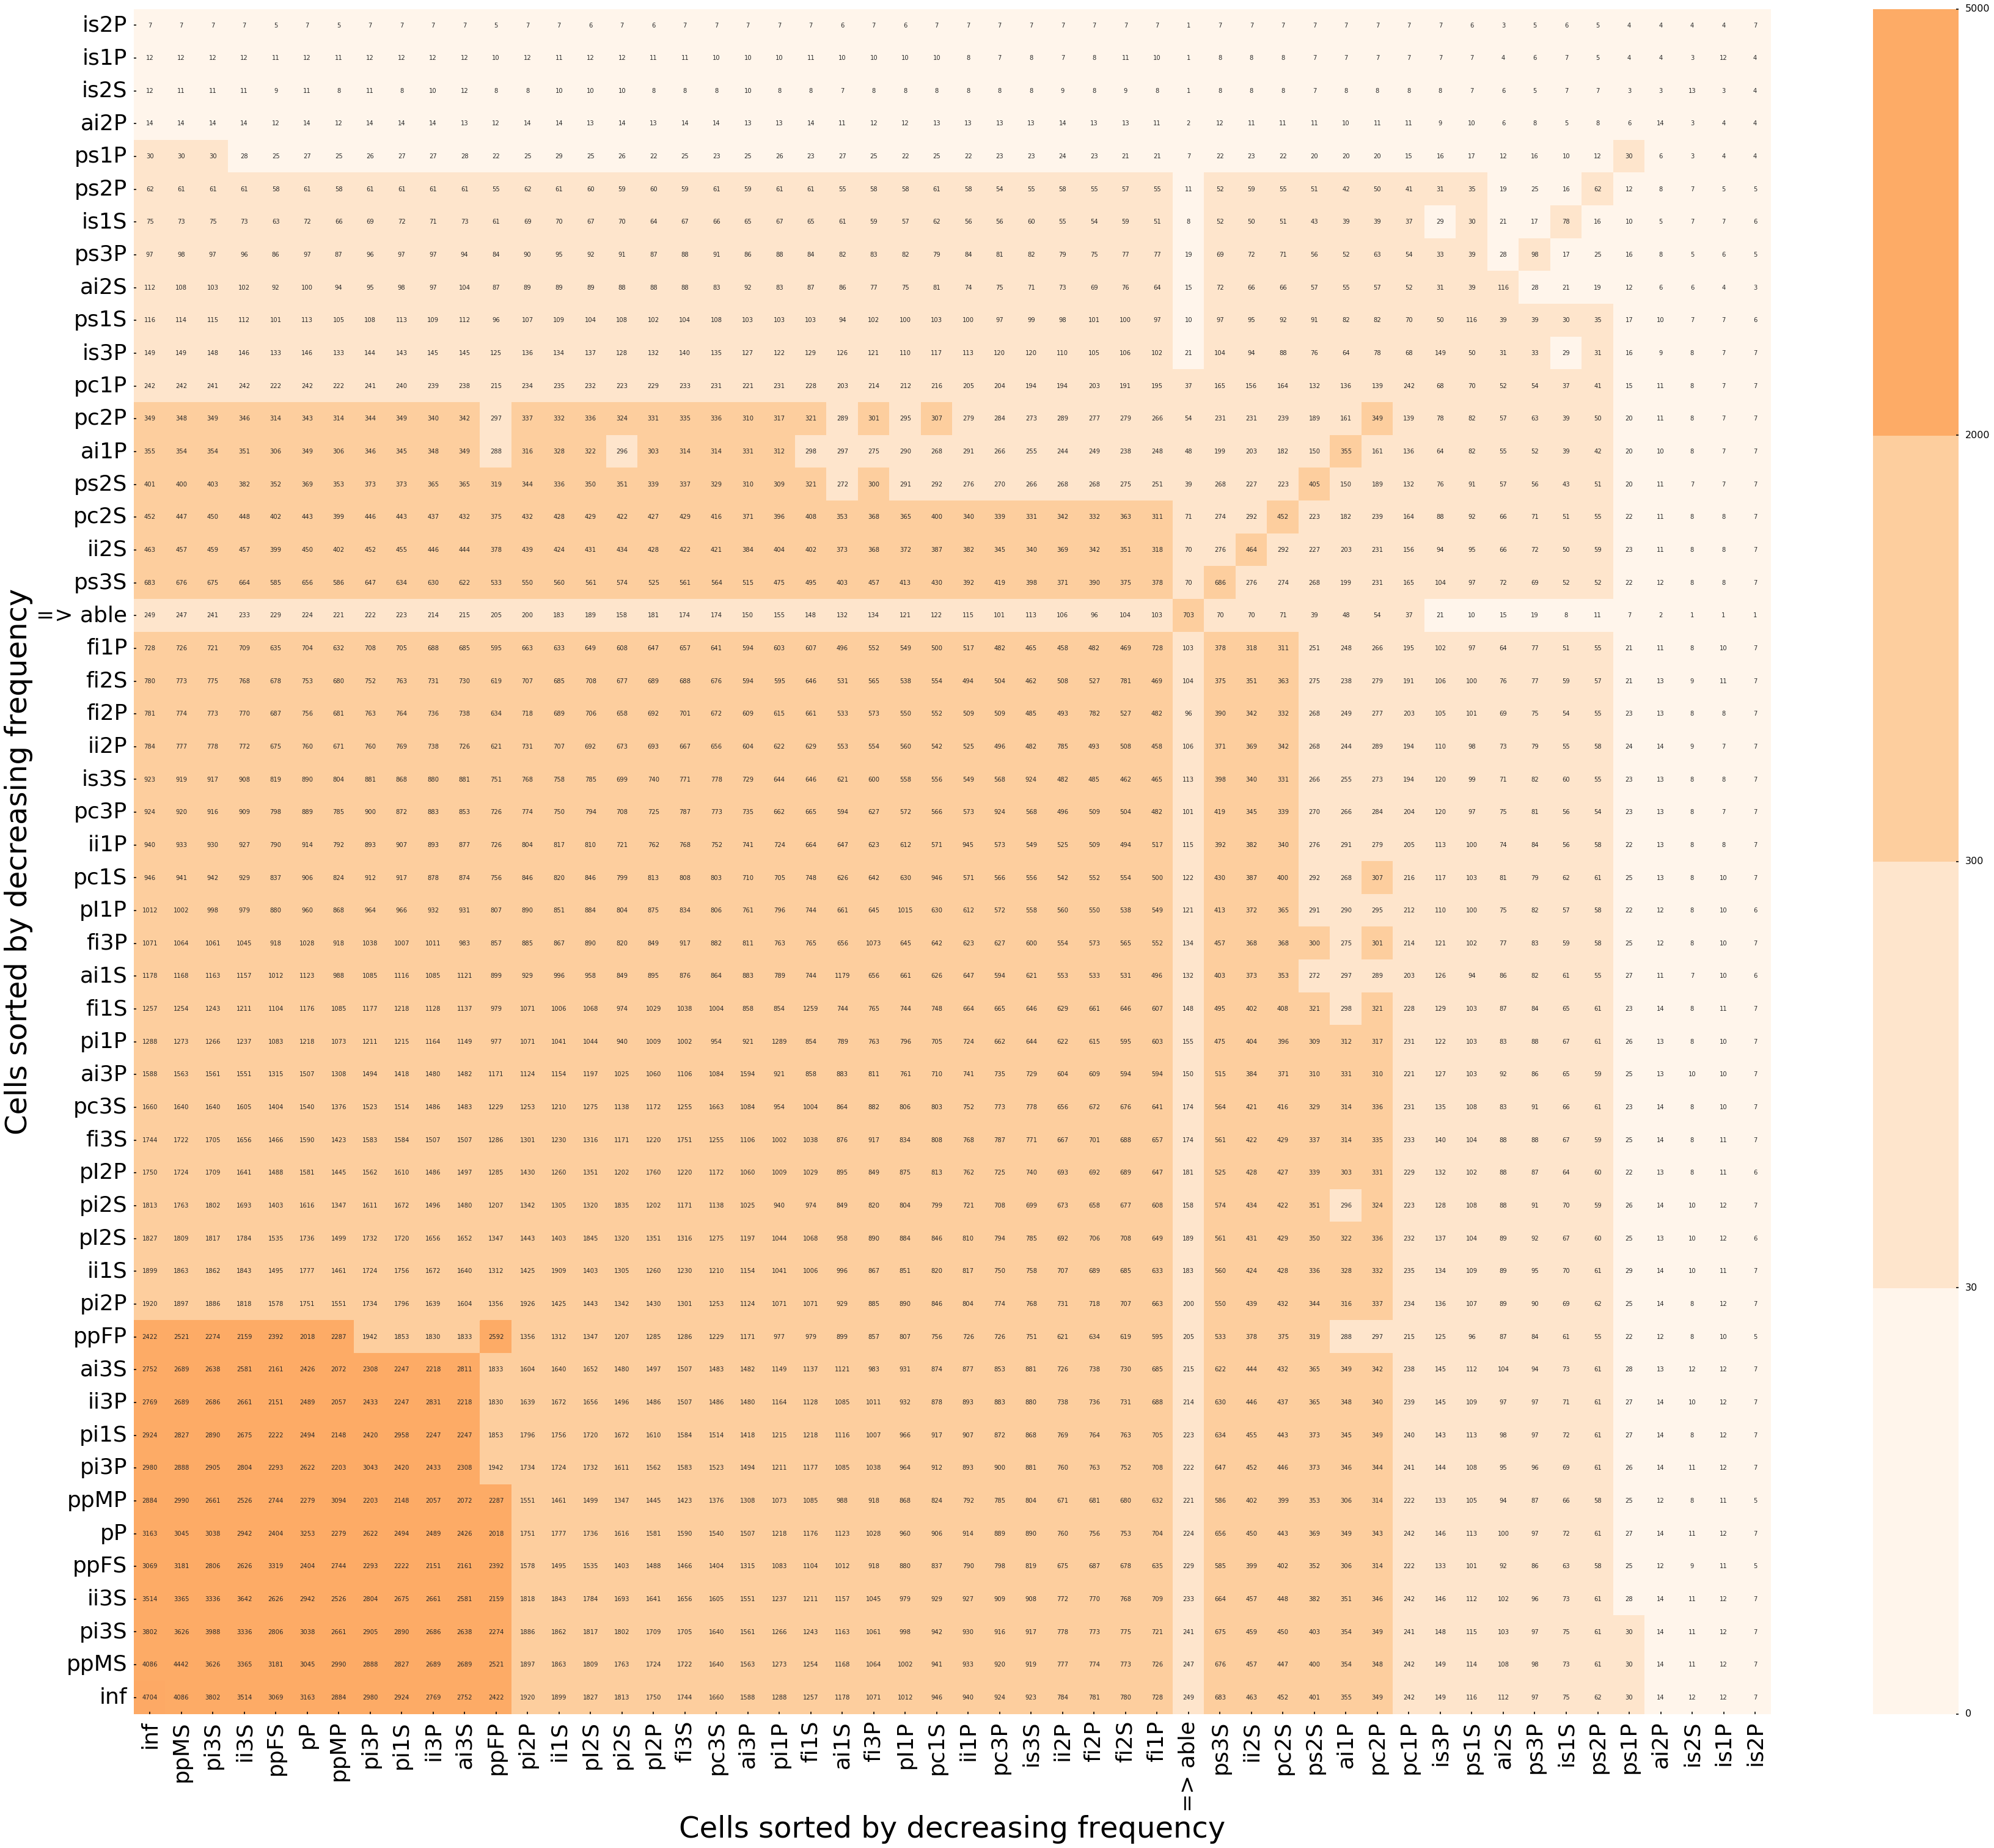

In [301]:
sortedSampleCases=sortCellFrequency(df)
print sortedSampleCases
df=df[sortedSampleCases]
df=df.reindex(sortedSampleCases[::-1])
heatmap(df)
plt.xlabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.ylabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.xticks(fontsize=36, rotation=90) 
plt.yticks(fontsize=36, rotation=0) 
#plt.show()
if saveFiles: plt.savefig("HM-VAble.png",dpi=150, bbox_inches="tight")

In [302]:
df.stack().quantile(.395)

150.0

In [303]:
df["=> able"].mean()

132.1153846153846

In [304]:
dfForms=dfVerbes3Join
dfParadigmes=dfForms.pivot_table(values='ortho', index=['lexeme'], columns=['case'], aggfunc=lambda x: ",".join(x)).reset_index().reindex()
df=tableauPaires(dfParadigmes)["nbPaires"]

[u'inf', u'ppMS', u'pi3S', u'ii3S', u'ppFS', u'pP', u'ppMP', u'pi3P', u'pi1S', u'ii3P', u'ai3S', u'ppFP', u'pi2P', u'ii1S', u'pI2S', u'pi2S', u'pI2P', u'fi3S', u'pc3S', u'ai3P', u'pi1P', u'fi1S', u'ai1S', u'fi3P', u'pI1P', u'pc1S', u'ii1P', u'pc3P', u'is3S', u'ii2P', u'fi2P', u'fi2S', u'fi1P', u'ps3S', u'ii2S', u'pc2S', u'ps2S', u'ai1P', u'pc2P', u'pc1P', u'is3P', u'ps1S', u'ai2S', u'ps3P', u'is1S', u'ps2P', u'ps1P', u'ai2P', u'is2S', u'is1P', u'is2P']


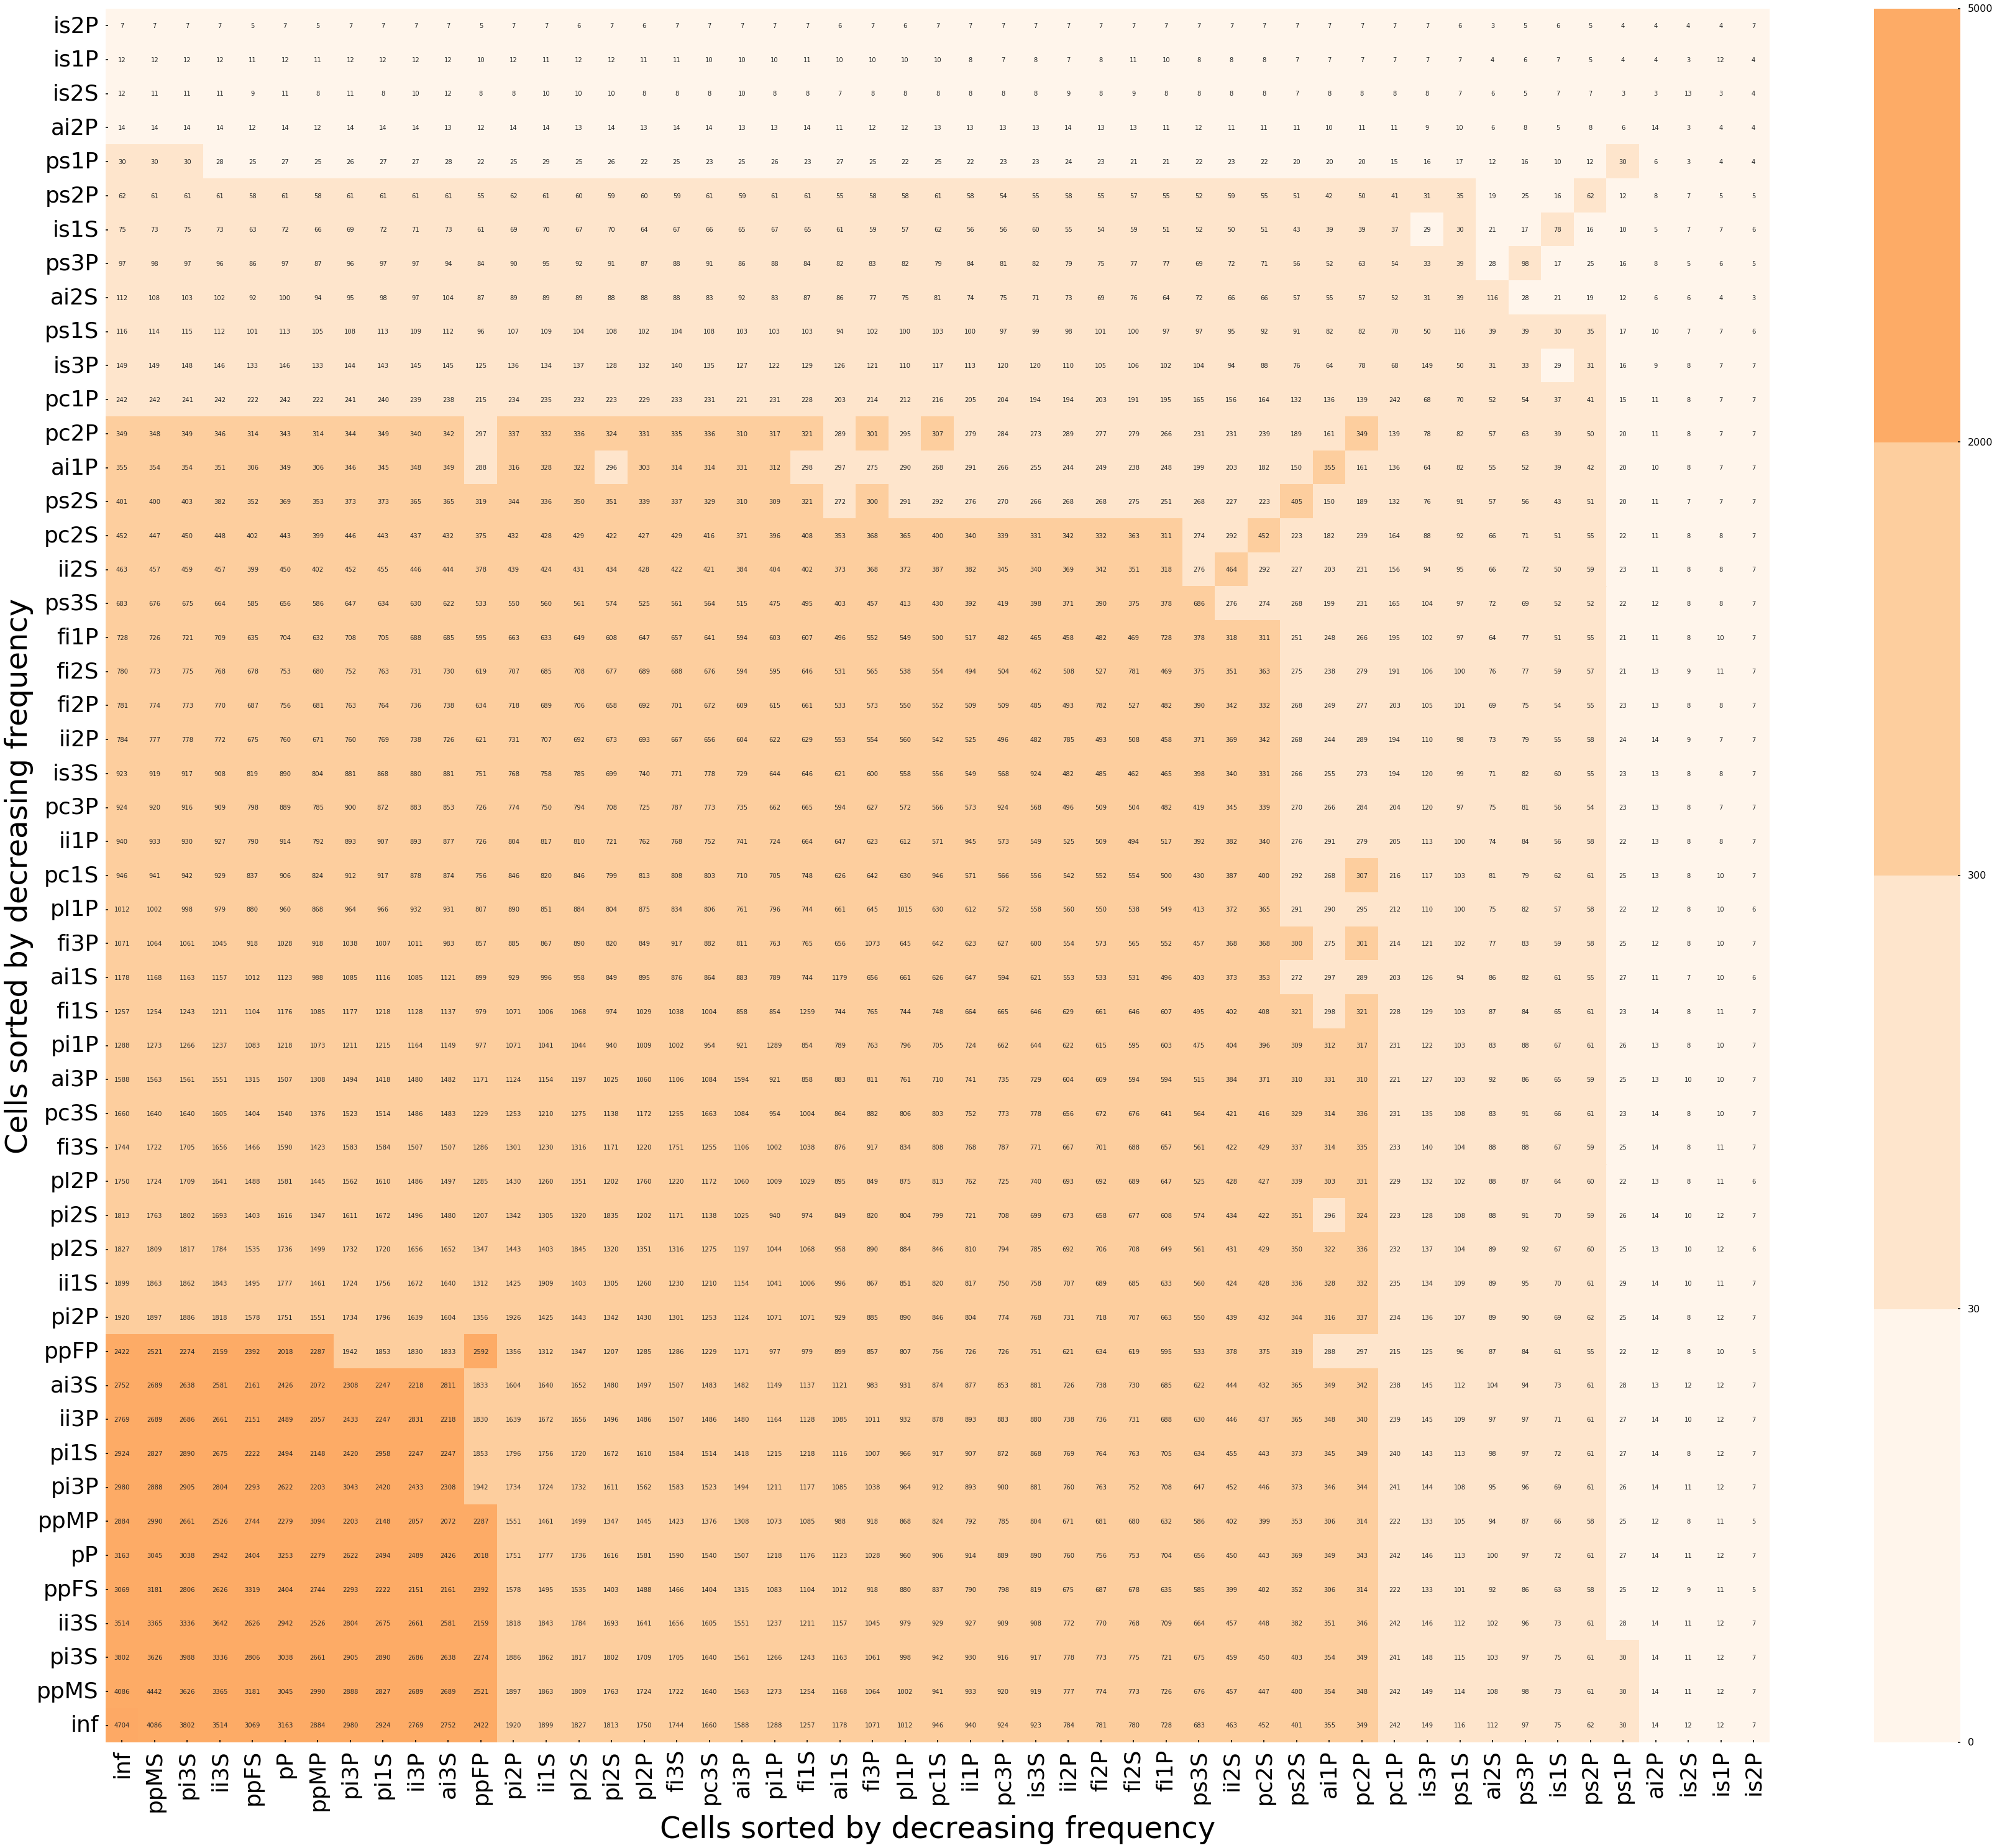

In [305]:
sortedSampleCases=sortCellFrequency(df)
print sortedSampleCases
df=df[sortedSampleCases]
df=df.reindex(sortedSampleCases[::-1])
heatmap(df)
plt.xlabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.ylabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.xticks(fontsize=36, rotation=90) 
plt.yticks(fontsize=36, rotation=0) 
#plt.show()
if saveFiles: plt.savefig("HM-VLex3.png",dpi=150, bbox_inches="tight")

In [317]:
dfParadigmes[dfParadigmes["lexeme"]==u"manger"].to_dict()

{u'ai1P': {3030: u'mange\xe2mes'},
 u'ai1S': {3030: u'mangeai'},
 u'ai2P': {3030: nan},
 u'ai2S': {3030: u'mangeas'},
 u'ai3P': {3030: u'mang\xe8rent'},
 u'ai3S': {3030: u'mangea'},
 u'fi1P': {3030: u'mangerons'},
 u'fi1S': {3030: u'mangerai'},
 u'fi2P': {3030: u'mangerez'},
 u'fi2S': {3030: u'mangeras'},
 u'fi3P': {3030: u'mangeront'},
 u'fi3S': {3030: u'mangera'},
 u'ii1P': {3030: u'mangions'},
 u'ii1S': {3030: u'mangeais'},
 u'ii2P': {3030: u'mangiez'},
 u'ii2S': {3030: u'mangeais'},
 u'ii3P': {3030: u'mangeaient'},
 u'ii3S': {3030: u'mangeait'},
 u'inf': {3030: u'manger'},
 u'is1P': {3030: nan},
 u'is1S': {3030: u'mangeasse'},
 u'is2P': {3030: nan},
 u'is2S': {3030: nan},
 u'is3P': {3030: nan},
 u'is3S': {3030: u'mange\xe2t'},
 'lexeme': {3030: u'manger'},
 u'pI1P': {3030: u'mangeons'},
 u'pI2P': {3030: u'mangez'},
 u'pI2S': {3030: u'mange'},
 u'pP': {3030: u'mangeant'},
 u'pc1P': {3030: u'mangerions'},
 u'pc1S': {3030: u'mangerais'},
 u'pc2P': {3030: u'mangeriez'},
 u'pc2S': {3030